In [1]:
# import packages

import pandas as pd
import numpy as np

import json
import datetime
import math

from datetime import timedelta, datetime

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

import seaborn as sns

# read the data
data = pd.read_pickle('sydney.pkl')

In [2]:
data.head(5)

,title,posted_ago,length,views,link,calories,date,days_since_posted,title_word_set,area,...,title_contains_tone,title_contains_kickboxing,title_contains_workout,title_contains_boot camp,title_contains_burnout,title_contains_toned,title_contains_superset,num_body_areas,num_workout_types,num_other_keywords
0,30 Minute HIIT Workout 🔥Burn 500 Calories! 🔥,1 year,31.0,197591,/watch?v=Mcpyp9PRtU8,500.0,2018-02-01,711.0,"{!, 🔥, calori, hiit, 500, minut, 🔥burn, workou...",full,...,False,False,True,False,False,False,False,1,2,1
1,30 Minute HIIT Tabata Workout Sydney Cummings,1 year,31.0,75863,/watch?v=m40O_U8_4UE,NaN,2018-02-06,706.0,"{sydney, cum, tabata, hiit, minut, workout, 30}",full,...,False,False,True,False,False,False,False,1,3,1
2,30 Minute Abs Workout With Sydney Cummings | B...,1 year,32.0,60328,/watch?v=DWUupF-Sfyc,350.0,2018-02-08,704.0,"{!, sydney, cum, 350, burn, with, calori, |, m...",ab,...,False,False,True,False,False,False,False,1,2,1
3,30 Minute Total Body HIIT 🔥Burn 430 Calories! 🔥,1 year,31.0,59741,/watch?v=R3T3U9iFg0o,430.0,2018-02-11,701.0,"{!, 430, 🔥, total, calori, hiit, minut, 🔥burn,...",full,...,False,False,False,False,False,False,False,1,1,0
4,30 Minute Workout For Beginners 🔥Burn 285 Calo...,1 year,31.0,18515,/watch?v=TLeMsJG30zU,285.0,2018-02-12,700.0,"{!, 🔥, beginn, calori, 285, minut, 🔥burn, for,...",full,...,False,False,True,False,False,False,False,1,2,1


In [9]:
data.columns

Index(['title', 'posted_ago', 'length', 'views', 'link', 'calories', 'date',
       'days_since_posted', 'title_word_set', 'area', 'workout_type',
       'is_butt_area', 'is_core_area', 'is_booti_area', 'is_shoulder_area',
       'is_lower_area', 'is_bicep_area', 'is_glute_area', 'is_back_area',
       'is_chest_area', 'is_hip_area', 'is_upper_area', 'is_leg_area',
       'is_full_area', 'is_tricep_area', 'is_ab_area', 'is_total_area',
       'is_arm_area', 'is_hamstr_area', 'is_thigh_area', 'is_stretch_workout',
       'is_pilat_workout', 'is_hiit_workout', 'is_yoga_workout',
       'is_tabata_workout', 'is_strength_workout', 'is_cardio_workout',
       'title_contains_plyo', 'title_contains_bootcamp',
       'title_contains_resistance', 'title_contains_agility',
       'title_contains_bodyweight', 'title_contains_circuit',
       'title_contains_conditioning', 'title_contains_athlete',
       'title_contains_speed', 'title_contains_toning',
       'title_contains_boxing', 'title_cont

In [4]:
data_numeric = data.select_dtypes(include='number')

data_numeric

,length,views,calories,days_since_posted,num_body_areas,num_workout_types,num_other_keywords
0,31.0,197591,500.0,711.0,1,2,1
1,31.0,75863,NaN,706.0,1,3,1
2,32.0,60328,350.0,704.0,1,2,1
3,31.0,59741,430.0,701.0,1,1,0
4,31.0,18515,285.0,700.0,1,2,1
...,...,...,...,...,...,...,...
724,43.0,23454,350.0,4.0,1,2,1
725,45.0,23036,490.0,3.0,1,2,1
726,34.0,21364,360.0,2.0,1,2,2
727,22.0,6683,NaN,1.0,1,1,0


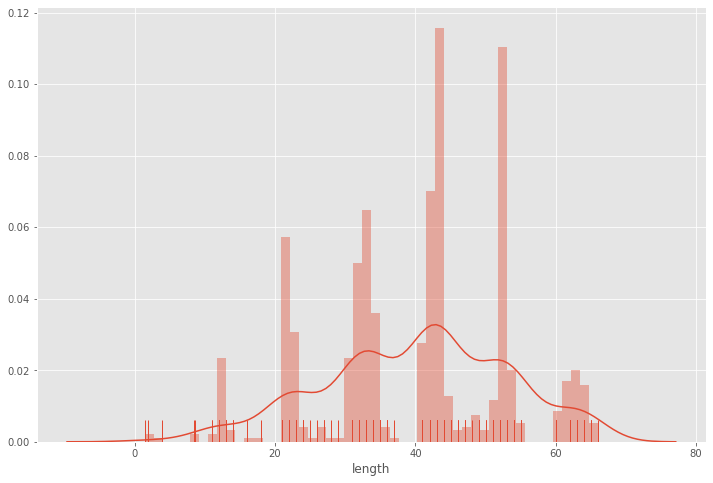

In [5]:
sns.distplot(data_numeric['length'], bins=50, kde=True, rug=True)

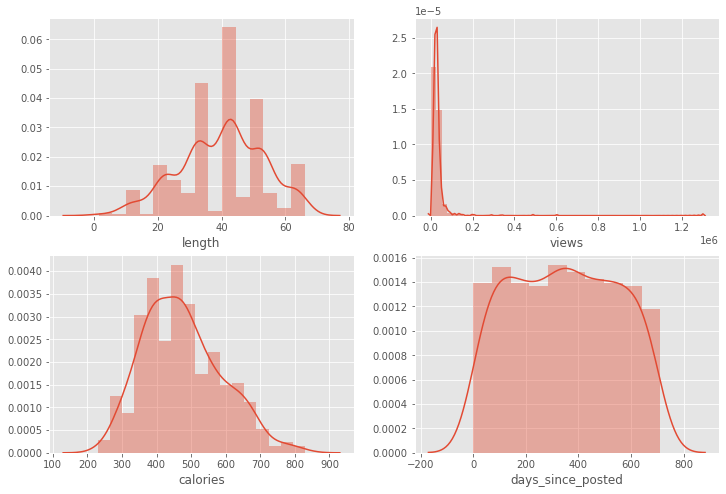

In [21]:
# this plots multiple seaborn histograms on different subplots.
# 
def plot_multiple_histograms(data, cols):
    num_plots = len(cols)
    num_cols = math.ceil(np.sqrt(num_plots))
    num_rows = math.ceil(num_plots/num_cols)
        
    fig, axs = plt.subplots(num_rows, num_cols)
    
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
            
        if num_rows == 1:
            if num_cols == 1:
                sns.distplot(data[col], kde=True, ax=axs)
            else:
                sns.distplot(data[col], kde=True, ax=axs[j])
        else:
            sns.distplot(data[col], kde=True, ax=axs[i, j])

            
plot_multiple_histograms(data, ['length', 'views', 
                                 'calories', 'days_since_posted'])


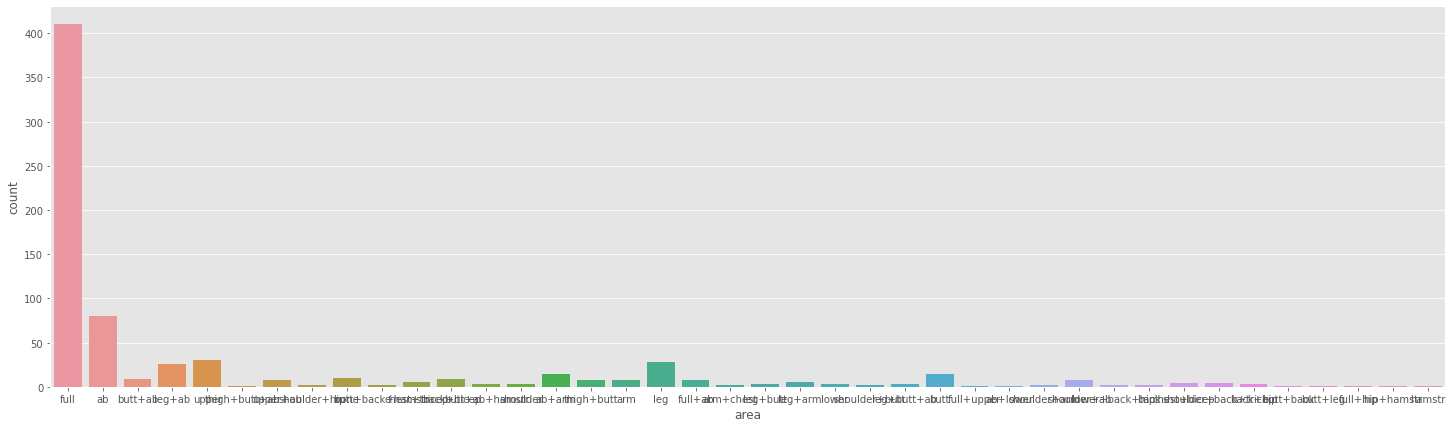

In [12]:
df_non_numeric = data.select_dtypes(exclude='number')


plt.figure(figsize=(25,7))
sns.countplot(x="area",
            data=df_non_numeric)

In [13]:
df_non_numeric

,title,posted_ago,link,date,title_word_set,area,workout_type,is_butt_area,is_core_area,is_booti_area,...,title_contains_boxing,title_contains_sport,title_contains_sculpt,title_contains_tone,title_contains_kickboxing,title_contains_workout,title_contains_boot camp,title_contains_burnout,title_contains_toned,title_contains_superset
0,30 Minute HIIT Workout 🔥Burn 500 Calories! 🔥,1 year,/watch?v=Mcpyp9PRtU8,2018-02-01,"{!, 🔥, calori, hiit, 500, minut, 🔥burn, workou...",full,hiit,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,30 Minute HIIT Tabata Workout Sydney Cummings,1 year,/watch?v=m40O_U8_4UE,2018-02-06,"{sydney, cum, tabata, hiit, minut, workout, 30}",full,tabata+hiit,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,30 Minute Abs Workout With Sydney Cummings | B...,1 year,/watch?v=DWUupF-Sfyc,2018-02-08,"{!, sydney, cum, 350, burn, with, calori, |, m...",ab,strength,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,30 Minute Total Body HIIT 🔥Burn 430 Calories! 🔥,1 year,/watch?v=R3T3U9iFg0o,2018-02-11,"{!, 430, 🔥, total, calori, hiit, minut, 🔥burn,...",full,hiit,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,30 Minute Workout For Beginners 🔥Burn 285 Calo...,1 year,/watch?v=TLeMsJG30zU,2018-02-12,"{!, 🔥, beginn, calori, 285, minut, 🔥burn, for,...",full,strength,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,40 Minute Upper Body and Cardio Finisher Worko...,4 days,/watch?v=ZPgMt3RsN6Y,2020-01-09,"{calori, and, |, minut, 40, cardio, !, 🔥the, f...",upper,cardio,False,False,False,...,False,False,False,False,False,True,False,False,False,False
725,40 Minute LEGS Workout! 🔥Burn 490 Calories!* 🔥...,3 days,/watch?v=7VtNR-EzWok,2020-01-10,"{!, challeng, calori, 🔥the, |, chang, leg, min...",leg,strength,False,False,False,...,False,False,False,False,False,True,False,False,False,False
726,30 Minute Sports Cardio Workout 🔥Burn 360 Calo...,2 days,/watch?v=QqodbwrdEq4,2020-01-11,"{!, 6, challeng, calori, 🔥the, |, 360, chang, ...",full,cardio,False,False,False,...,False,True,False,False,False,True,False,False,False,False
727,20 Minute Sore Body Deep Stretch | The CHANGE ...,1 day,/watch?v=GmS3BEWbYgQ,2020-01-12,"{day, sore, the, challeng, |, stretch, chang, ...",full,stretch,False,False,False,...,False,False,False,False,False,False,False,False,False,False


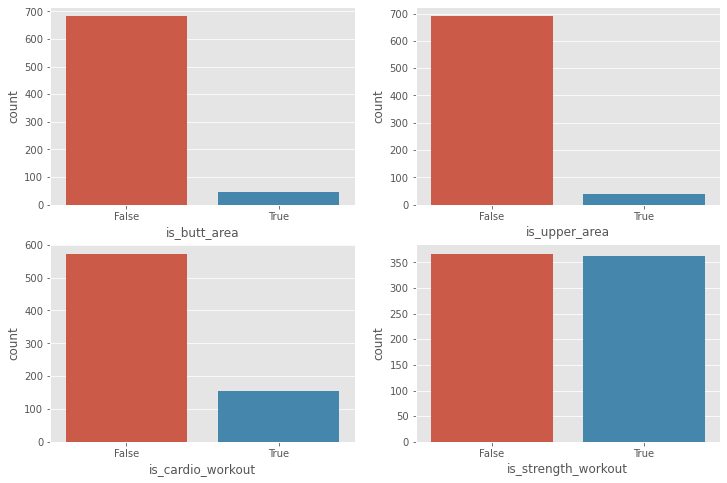

In [24]:
# this plots multiple seaborn countplots on different subplots.
# 
def plot_multiple_countplots(data, cols):
    num_plots = len(cols)
    num_cols = math.ceil(np.sqrt(num_plots))
    num_rows = math.ceil(num_plots/num_cols)
        
    fig, axs = plt.subplots(num_rows, num_cols)
    
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
        
        if num_rows == 1:
            if num_cols == 1:
                sns.countplot(x=data[col], ax=axs)
            else:
                sns.countplot(x=data[col], ax=axs[j])
        else:
            sns.countplot(x=data[col], ax=axs[i, j])
            
            
plot_multiple_countplots(df_non_numeric, ['is_butt_area', 'is_upper_area', 
                                           'is_cardio_workout', 'is_strength_workout'])


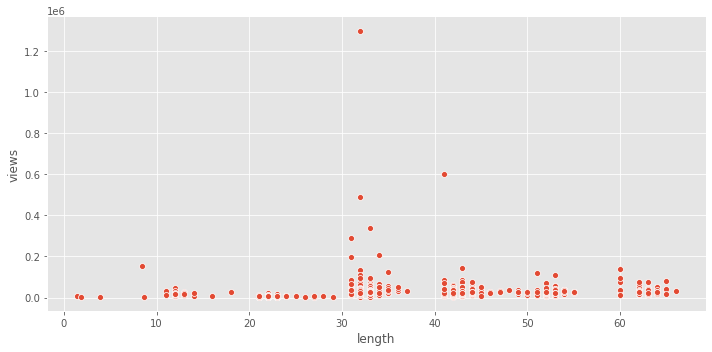

In [25]:
sns.relplot(x='length', y='views', data=data, aspect=2.0)


In [28]:
top6 = list(data['area'].value_counts().index[:5])
data['area2'] = data['area']

msk = data['area2'].isin(top6)
data.loc[~msk, 'area2'] = 'Other'

top4 = list(data['workout_type'].value_counts().index[:3])
data['workout_type2'] = data['workout_type']

msk = data['workout_type2'].isin(top4)
data.loc[~msk, 'workout_type2'] = 'Other'

In [29]:
top6

['full', 'ab', 'upper', 'leg', 'leg+ab']

In [30]:
top4

['strength', 'hiit', 'stretch']

In [31]:
msk

0       True
1      False
2       True
3       True
4       True
       ...  
724    False
725     True
726    False
727     True
728     True
Name: workout_type2, Length: 729, dtype: bool

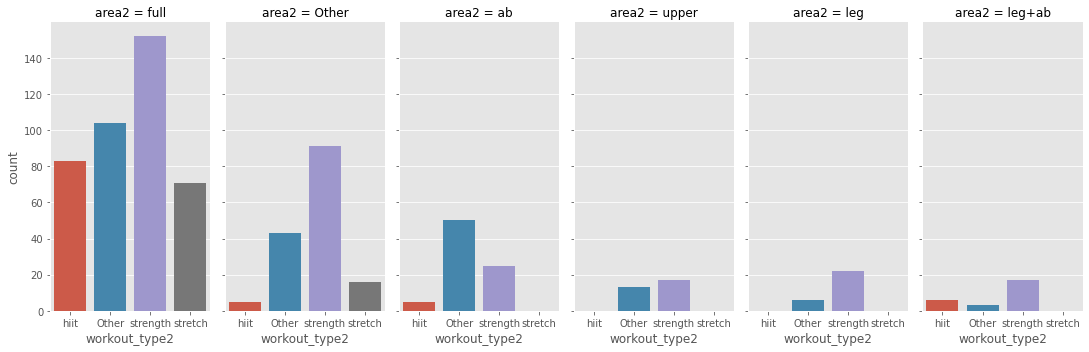

In [32]:
order = data['area2'].value_counts().index # order the columns from highest count to lowest.
sns.catplot(x="workout_type2",
            col='area2',
            col_order=order,
            kind="count", data=data,
            aspect=0.5)


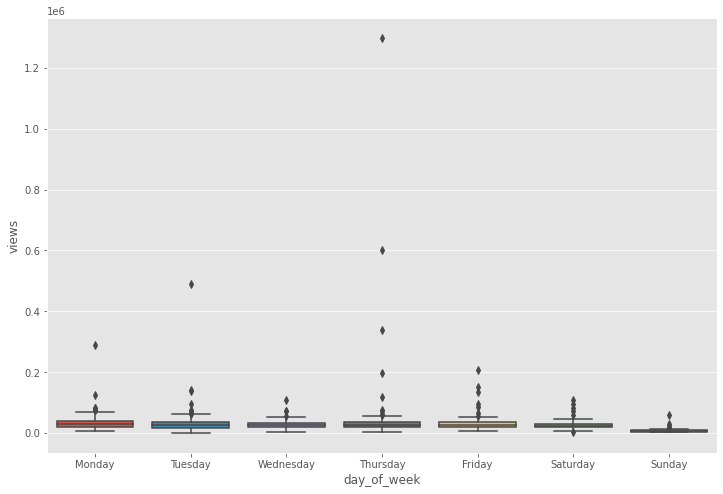

In [33]:
to_replace = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
data['day_of_week_num'] = data['date'].dt.dayofweek
data['day_of_week'] = data['day_of_week_num'].replace(to_replace=to_replace)

order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.boxplot(x="day_of_week", y="views", data=data, order=order)

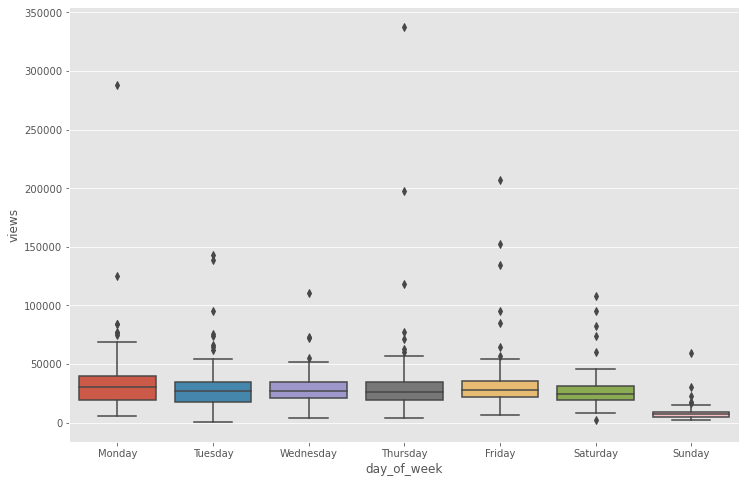

In [35]:
msk = data['views'] < 400000
sns.boxplot(x="day_of_week", y="views", data=data[msk], order=order)

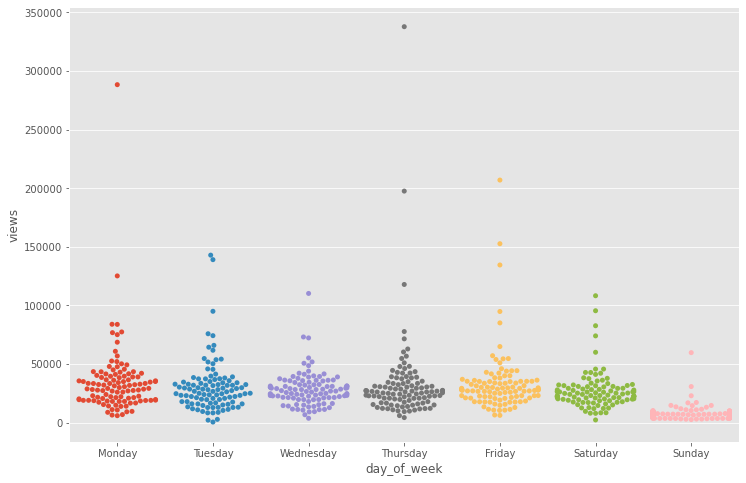

In [36]:
sns.swarmplot(x="day_of_week", y="views", data=data[msk], order=order)

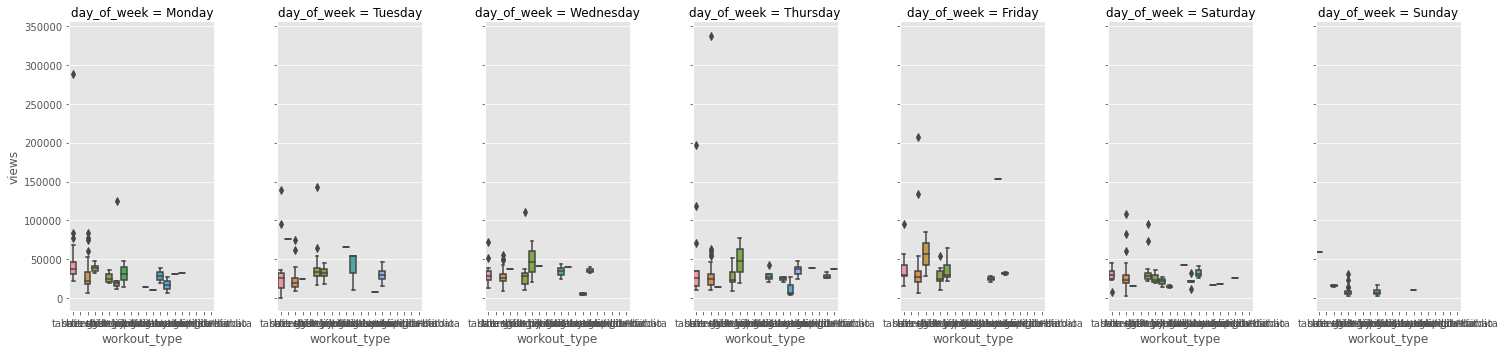

In [37]:
sns.catplot(x="workout_type", y="views",
            col="day_of_week", aspect=.6,
            kind="box", data=data[msk], col_order=order);

In [38]:
data['workout_type'].value_counts()

strength                324
hiit                     99
stretch                  87
cardio                   82
hiit+cardio              28
tabata+cardio            20
strength+hiit            16
tabata                   14
yoga                     13
none                     11
strength+cardio          10
pilat+cardio              8
pilat                     6
cardio+hiit               4
tabata+hiit+cardio        2
tabata+hiit               1
yoga+pilat                1
strength+tabata           1
tabata+pilat+cardio       1
strength+hiit+cardio      1
Name: workout_type, dtype: int64

In [39]:
top4 = list(data['workout_type'].value_counts().index[:3])
data['workout_type2'] = data['workout_type']

msk = data['workout_type2'].isin(top4)
data.loc[~msk, 'workout_type2'] = 'Other'


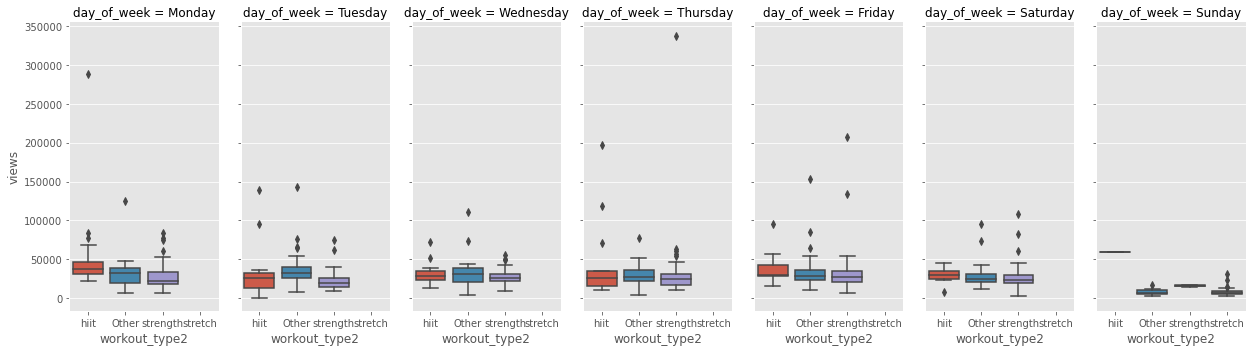

In [40]:
msk = data['views'] < 400000

sns.catplot(x="workout_type2", y="views",
            col="day_of_week",
            kind="box", data=data[msk], col_order=order,
            aspect=0.5)


In [44]:
df_area_workout = data.groupby(['area', 'workout_type'])['views'].count().reset_index()

In [45]:
df_area_workout 

,area,workout_type,views
0,ab,cardio,25
1,ab,hiit,5
2,ab,hiit+cardio,9
3,ab,none,1
4,ab,strength,25
...,...,...,...
84,upper,cardio,8
85,upper,hiit+cardio,2
86,upper,strength,17
87,upper,strength+cardio,3


In [49]:
df_area_workout_pivot = df_area_workout.pivot(index='area', columns='workout_type', values='views').fillna(0)

In [50]:
df_area_workout_pivot

workout_type,cardio,cardio+hiit,hiit,hiit+cardio,none,pilat,pilat+cardio,strength,strength+cardio,strength+hiit,strength+hiit+cardio,strength+tabata,stretch,tabata,tabata+cardio,tabata+hiit,tabata+hiit+cardio,tabata+pilat+cardio,yoga,yoga+pilat
area,,,,,,,,,,,,,,,,,,,,
ab,25.0,0.0,5.0,9.0,1.0,0.0,0.0,25.0,1.0,0.0,0.0,0.0,0.0,1.0,10.0,0.0,2.0,1.0,0.0,0.0
ab+arm,2.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ab+lower,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
arm,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
arm+chest,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
back,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
back+bicep,4.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
back+hip,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
butt,2.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0


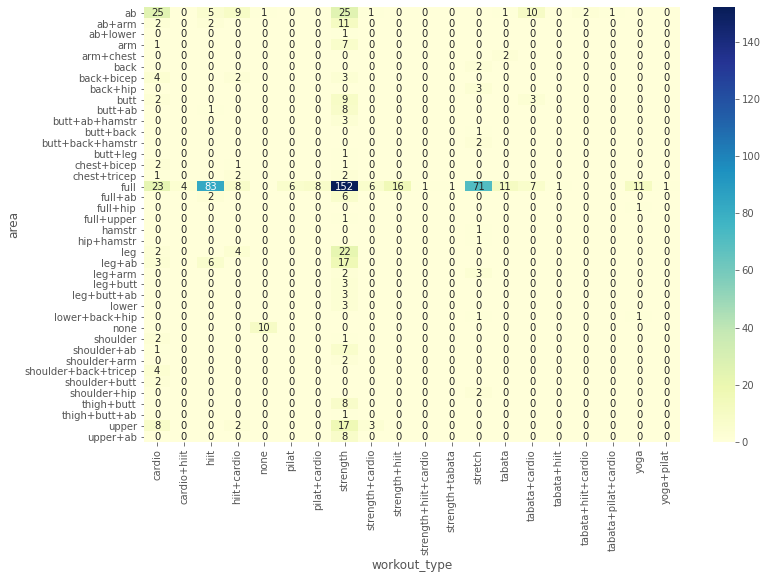

In [51]:
sns.heatmap(df_area_workout_pivot, annot=True, fmt='.0f', cmap="YlGnBu")

In [52]:
cols = ['length', 'views', 'calories', 'days_since_posted', 'area', 'workout_type', 'day_of_week']
df_test = data[cols]
df_test.head()

,length,views,calories,days_since_posted,area,workout_type,day_of_week
0,31.0,197591,500.0,711.0,full,hiit,Thursday
1,31.0,75863,NaN,706.0,full,tabata+hiit,Tuesday
2,32.0,60328,350.0,704.0,ab,strength,Thursday
3,31.0,59741,430.0,701.0,full,hiit,Sunday
4,31.0,18515,285.0,700.0,full,strength,Monday


In [53]:
numeric_columns = set(df_test.select_dtypes(include=['number']).columns)
non_numeric_columns = set(df_test.columns) - numeric_columns
print(numeric_columns)
print(non_numeric_columns)


{'views', 'length', 'calories', 'days_since_posted'}
{'workout_type', 'day_of_week', 'area'}
